# [프로젝트4] 금속분말 생성공정 최적화를 위한 비선형회귀 기법


---

## 프로젝트 목표
---
- 다항회귀 분석을 수행해봅니다.
- MLP 모델을 구현해봅니다.
- 다양한 학습률을 비교해봅니다.
- 다양한 최적화 함수를 비교해봅니다.
- 금속분말 데이터를 MLP 모델에 적용해봅니다.

## 프로젝트 목차
---
1. **다항 회귀 분석 수행:** 다항 회귀 분석 모델을 학습, 예측, 평가해봅니다.

2. **MLP 모델의 구현:** Keras 를 이용한 MLP 구현

3. **회귀 모델 수행:** 금속분말 데이터셋을 이용하여 회귀모델 학습

## 프로젝트 개요
---

이번 프로젝트에서는 다항 회귀 분석을 수행해보고, 비선형 데이터를 다룰 수 있는 MLP 모델에 대해 배워봅니다.

## 1. 다항회귀 분석 수행
---
다항 회귀 분석 모델을 구현해보고, 성능을 비교해봅니다.


### 1.1 라이브러리 불러오기

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn

### 1.2 데이터 생성

In [27]:
np.random.seed(0)
X = np.random.normal(size = (1000, 1)) 
y = X ** 3 * 3 + X ** 2 * 2 + X - 2 + np.random.normal(size = (1000, 1)) * 3

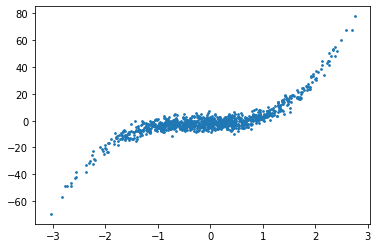

In [28]:
plt.scatter(X, y, s = 3)
plt.show()

### 1.3 데이터 분할

In [29]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X) * train_ratio)].reshape(-1, 1)
test_X = X[int(len(X) * train_ratio):].reshape(-1, 1)
test_y = y[int(len(X) * train_ratio):].reshape(-1, 1)

### 1.4 선형 회귀 모델

### 1.4.1 최소제곱 선형 회귀 모델 학습

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
fitter = LinearRegression()
fitter

LinearRegression()

In [33]:
fitter.fit(train_X, train_y)

LinearRegression()

### 1.4.2 최소제곱 선형 회귀 모델 예측

In [34]:
pred = fitter.predict(test_X)

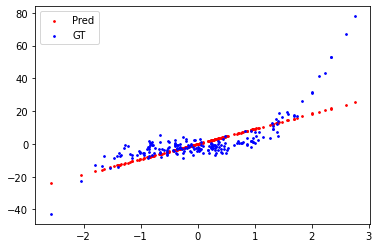

In [35]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 1.4.3 최소제곱 선형 회귀 모델 평가

In [36]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.584614


### 1.5 다항 회귀 모델

### 1.5.1 데이터 전처리

In [39]:
train_Xs = np.concatenate([train_X ** 3, train_X ** 2, train_X], axis=1)
test_Xs = np.concatenate([test_X ** 3, test_X ** 2, test_X], axis=1)

### 1.5.2 최소제곱 선형 회귀 모델 학습

In [40]:
fitter = LinearRegression()
fitter

LinearRegression()

In [41]:
fitter.fit(train_Xs, train_y)

LinearRegression()

### 1.5.3 최소제곱 선형 회귀 모델 예측

In [44]:
pred = fitter.predict(test_Xs)

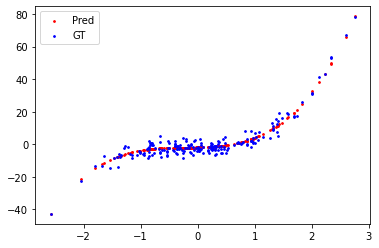

In [45]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 1.5.4 최소제곱 선형 회귀 모델 평가

In [46]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.949834


### 1.6 다항 피쳐 선택에 따른 모델 성능 비교

2제곱에서 24제곱까지의 다항 피쳐를 사용하였을 때 성능을 비교해보겠습니다.

In [60]:
degrees = np.arange(2, 25)
print(degrees)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [69]:
r2s = []
for degree in degrees:
    train_Xs = np.concatenate([train_X ** i for i in range(degree + 1)], axis=1)
    test_Xs = np.concatenate([test_X ** i for i in range(degree + 1)], axis=1)
    fitter = LinearRegression()
    fitter.fit(train_Xs, train_y)
    pred = fitter.predict(test_Xs)
    r2 = sklearn.metrics.r2_score(test_y, pred)
    print("Degree: %d -> R2 score: %f"%(degree, r2))
    r2s.append(r2)

Degree: 2 -> R2 score: 0.652474
Degree: 3 -> R2 score: 0.949834
Degree: 4 -> R2 score: 0.949863
Degree: 5 -> R2 score: 0.949525
Degree: 6 -> R2 score: 0.948715
Degree: 7 -> R2 score: 0.948016
Degree: 8 -> R2 score: 0.948088
Degree: 9 -> R2 score: 0.948196
Degree: 10 -> R2 score: 0.947491
Degree: 11 -> R2 score: 0.946404
Degree: 12 -> R2 score: 0.945894
Degree: 13 -> R2 score: 0.948829
Degree: 14 -> R2 score: 0.948599
Degree: 15 -> R2 score: 0.937195
Degree: 16 -> R2 score: 0.922179
Degree: 17 -> R2 score: 0.922574
Degree: 18 -> R2 score: 0.883105
Degree: 19 -> R2 score: 0.735307
Degree: 20 -> R2 score: 0.937408
Degree: 21 -> R2 score: 0.935197
Degree: 22 -> R2 score: -0.652393
Degree: 23 -> R2 score: -0.352345
Degree: 24 -> R2 score: -4.219459


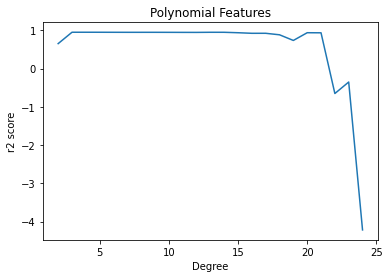

In [70]:
plt.plot(degrees, r2s)
plt.title('Polynomial Features')
plt.xlabel('Degree')
plt.ylabel('r2 score')
plt.show()

피쳐를 과도하게 많이 사용하면 오히려 모델의 성능이 떨어지는 것을 확인할 수 있습니다. 적절한 degree를 찾아 설정해주는 것이 중요하겠습니다.

## 2. MLP 모델의 구현
---
다음으로, 비선형 데이터를 잘 다룰 수 있는 다층 퍼셉트론 모델 (Multi-layer perceptron; MLP) 을 구현해보겠습니다.

### 2.1 라이브러리 불러오기

In [74]:
import tensorflow as tf

### 2.2 비선형 데이터 생성

In [88]:
np.random.seed(0)
X = np.random.normal(size = (1000, 1)) 
y = np.e ** X + np.random.normal(size = (1000, 1)) * 1

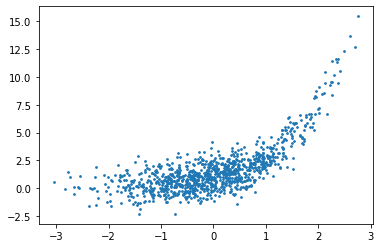

In [89]:
plt.scatter(X, y, s = 3)
plt.show()

### 2.3 데이터 분할

In [95]:
train_ratio = 0.8
train_X = X[:int(len(X) * train_ratio)].reshape(-1, 1)
train_y = y[:int(len(X) * train_ratio)].reshape(-1, 1)
test_X = X[int(len(X) * train_ratio):].reshape(-1, 1)
test_y = y[int(len(X) * train_ratio):].reshape(-1, 1)

### 2.4 MLP 모델 설정

In [96]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

### 2.5 학습 방법 설정

In [102]:
MLP_model.compile(loss = 'mse',
              optimizer = 'adam',
              metrics = ['mse'])

### 2.6 모델 학습

In [103]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 0.9470 - mse: 0.9470
Epoch 2/10
50/50 - 0s - loss: 0.9518 - mse: 0.9518
Epoch 3/10
50/50 - 0s - loss: 0.9390 - mse: 0.9390
Epoch 4/10
50/50 - 0s - loss: 0.9397 - mse: 0.9397
Epoch 5/10
50/50 - 0s - loss: 0.9452 - mse: 0.9452
Epoch 6/10
50/50 - 0s - loss: 0.9386 - mse: 0.9386
Epoch 7/10
50/50 - 0s - loss: 0.9462 - mse: 0.9462
Epoch 8/10
50/50 - 0s - loss: 0.9456 - mse: 0.9456
Epoch 9/10
50/50 - 0s - loss: 0.9483 - mse: 0.9483
Epoch 10/10
50/50 - 0s - loss: 0.9380 - mse: 0.9380


### 2.7 모델 예측

In [104]:
pred = MLP_model.predict(test_X)

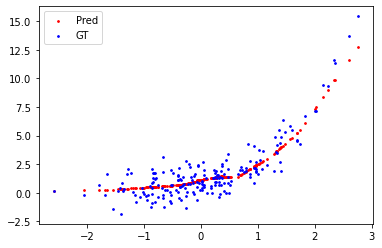

In [105]:
plt.scatter(test_X, pred, s = 3, c = 'red', label = 'Pred')
plt.scatter(test_X, test_y, s = 3, c = 'blue', label = 'GT')
plt.legend()
plt.show()

### 2.8 모델 평가

In [106]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.838681


이론적으로 R2-score 는 선형 회귀의 설명력에 대한 지표이기 때문에 비선형 회귀에 적용할 수 없습니다. 그러나, 여기서는 통계학적으로 깊이 들어가지는 않을 것이기 때문에 편의를 위해 R2-score를 사용하겠습니다.

### 2.9 학습률 조정해보기

### 2.9.1 학습률이 너무 클 때

In [159]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [160]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.3),
              metrics = ['mse'])

In [161]:
history_toobig = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 4.6129 - mse: 4.6129
Epoch 2/10
50/50 - 0s - loss: 4.0245 - mse: 4.0245
Epoch 3/10
50/50 - 0s - loss: 4.0160 - mse: 4.0160
Epoch 4/10
50/50 - 0s - loss: 4.1577 - mse: 4.1577
Epoch 5/10
50/50 - 0s - loss: 4.0337 - mse: 4.0337
Epoch 6/10
50/50 - 0s - loss: 4.0755 - mse: 4.0755
Epoch 7/10
50/50 - 0s - loss: 4.1126 - mse: 4.1126
Epoch 8/10
50/50 - 0s - loss: 4.1574 - mse: 4.1574
Epoch 9/10
50/50 - 0s - loss: 4.1623 - mse: 4.1623
Epoch 10/10
50/50 - 0s - loss: 4.1233 - mse: 4.1233


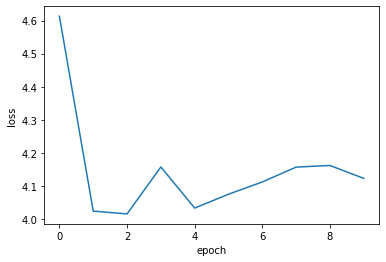

In [162]:
plt.plot(history_toobig.epoch, history_toobig.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [163]:
pred = MLP_model.predict(test_X)

In [164]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: -0.029244


### 2.9.2 학습률이 적당할 때

In [165]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [166]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01),
              metrics = ['mse'])

In [167]:
history_good = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 3.2425 - mse: 3.2425
Epoch 2/10
50/50 - 0s - loss: 1.4590 - mse: 1.4590
Epoch 3/10
50/50 - 0s - loss: 1.3205 - mse: 1.3205
Epoch 4/10
50/50 - 0s - loss: 1.2331 - mse: 1.2331
Epoch 5/10
50/50 - 0s - loss: 1.2096 - mse: 1.2096
Epoch 6/10
50/50 - 0s - loss: 1.1674 - mse: 1.1674
Epoch 7/10
50/50 - 0s - loss: 1.1509 - mse: 1.1509
Epoch 8/10
50/50 - 0s - loss: 1.0952 - mse: 1.0952
Epoch 9/10
50/50 - 0s - loss: 1.0734 - mse: 1.0734
Epoch 10/10
50/50 - 0s - loss: 1.0471 - mse: 1.0471


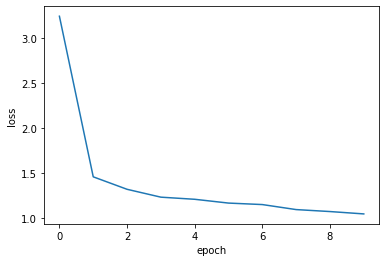

In [168]:
plt.plot(history_good.epoch, history_good.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [169]:
pred = MLP_model.predict(test_X)

In [170]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.783061


### 2.9.3 학습률이 너무 낮을 때

In [171]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [172]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
              metrics = ['mse'])

In [173]:
history_toolow = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 6.5101 - mse: 6.5101
Epoch 2/10
50/50 - 0s - loss: 6.3648 - mse: 6.3648
Epoch 3/10
50/50 - 0s - loss: 6.2274 - mse: 6.2274
Epoch 4/10
50/50 - 0s - loss: 6.0982 - mse: 6.0982
Epoch 5/10
50/50 - 0s - loss: 5.9765 - mse: 5.9765
Epoch 6/10
50/50 - 0s - loss: 5.8604 - mse: 5.8604
Epoch 7/10
50/50 - 0s - loss: 5.7487 - mse: 5.7487
Epoch 8/10
50/50 - 0s - loss: 5.6404 - mse: 5.6404
Epoch 9/10
50/50 - 0s - loss: 5.5358 - mse: 5.5358
Epoch 10/10
50/50 - 0s - loss: 5.4349 - mse: 5.4349


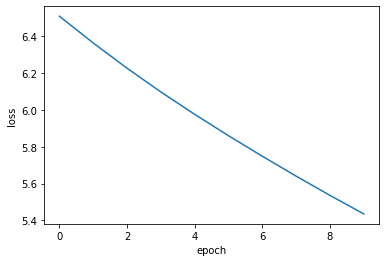

In [174]:
plt.plot(history_toolow.epoch, history_toolow.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [176]:
pred = MLP_model.predict(test_X)

In [177]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: -0.300543


### 2.9.4 학습률에 따른 loss 변화 그래프

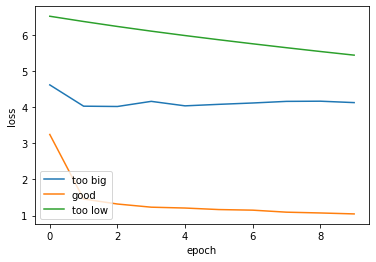

In [178]:
plt.plot(history_toobig.epoch, history_toobig.history['loss'], label = 'too big')
plt.plot(history_good.epoch, history_good.history['loss'], label = 'good')
plt.plot(history_toolow.epoch, history_toolow.history['loss'], label = 'too low')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

### 2.10 최적화 방법 (Optimizer) 조정해보기

### 2.10.1 Stochastic Gradient Descent

In [179]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [180]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

In [181]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 2.7456 - mse: 2.7456
Epoch 2/10
50/50 - 0s - loss: 1.3951 - mse: 1.3951
Epoch 3/10
50/50 - 0s - loss: 1.2939 - mse: 1.2939
Epoch 4/10
50/50 - 0s - loss: 1.2347 - mse: 1.2347
Epoch 5/10
50/50 - 0s - loss: 1.1863 - mse: 1.1863
Epoch 6/10
50/50 - 0s - loss: 1.1600 - mse: 1.1600
Epoch 7/10
50/50 - 0s - loss: 1.1213 - mse: 1.1213
Epoch 8/10
50/50 - 0s - loss: 1.1012 - mse: 1.1012
Epoch 9/10
50/50 - 0s - loss: 1.0758 - mse: 1.0758
Epoch 10/10
50/50 - 0s - loss: 1.0508 - mse: 1.0508


In [182]:
pred = MLP_model.predict(test_X)

In [183]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.795745


### 2.10.2 Adagrad

In [191]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [192]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adagrad(),
              metrics = ['mse'])

In [193]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 5.8091 - mse: 5.8091
Epoch 2/10
50/50 - 0s - loss: 5.2323 - mse: 5.2323
Epoch 3/10
50/50 - 0s - loss: 4.8299 - mse: 4.8299
Epoch 4/10
50/50 - 0s - loss: 4.5102 - mse: 4.5102
Epoch 5/10
50/50 - 0s - loss: 4.2304 - mse: 4.2304
Epoch 6/10
50/50 - 0s - loss: 3.9961 - mse: 3.9961
Epoch 7/10
50/50 - 0s - loss: 3.7890 - mse: 3.7890
Epoch 8/10
50/50 - 0s - loss: 3.6000 - mse: 3.6000
Epoch 9/10
50/50 - 0s - loss: 3.4261 - mse: 3.4261
Epoch 10/10
50/50 - 0s - loss: 3.2650 - mse: 3.2650


In [194]:
pred = MLP_model.predict(test_X)

In [195]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.199000


### 2.10.3 Adam

In [196]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [197]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['mse'])

In [198]:
history = MLP_model.fit(train_X, train_y, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
50/50 - 0s - loss: 3.6454 - mse: 3.6454
Epoch 2/10
50/50 - 0s - loss: 1.4708 - mse: 1.4708
Epoch 3/10
50/50 - 0s - loss: 1.3338 - mse: 1.3338
Epoch 4/10
50/50 - 0s - loss: 1.2832 - mse: 1.2832
Epoch 5/10
50/50 - 0s - loss: 1.2648 - mse: 1.2648
Epoch 6/10
50/50 - 0s - loss: 1.2296 - mse: 1.2296
Epoch 7/10
50/50 - 0s - loss: 1.1995 - mse: 1.1995
Epoch 8/10
50/50 - 0s - loss: 1.1656 - mse: 1.1656
Epoch 9/10
50/50 - 0s - loss: 1.1439 - mse: 1.1439
Epoch 10/10
50/50 - 0s - loss: 1.1222 - mse: 1.1222


In [199]:
pred = MLP_model.predict(test_X)

In [200]:
r2 = sklearn.metrics.r2_score(test_y, pred)
print("R2 score: %f"%r2)

R2 score: 0.766081


실험 결과 SGD 가 가장 높은 성능을 보였으며, Adagrad가 가장 낮은 성능을 보였습니다. 그러나, 데이터에 따라 최적화 방법의 성능은 달라질 수 있으며, 설정 가능한 parameter를 어떻게 설정하는지 역시 중요합니다.

## 3. 회귀 모델 수행
---
다음으로, 금속분말 데이터를 이용하여 MLP 를 학습해보겠습니다.

### 3.1 라이브러리 불러오기

In [201]:
import numpy as np
import json

### 3.2 학습용, 검증용, 테스트용 데이터 읽어오기

In [202]:
stage1 = {
    'train_X': np.load('./Data/train_data_stage1_X.npy'),
    'train_y': np.load('./Data/train_data_stage1_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage1_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage1_y.npy'),
    'test_X': np.load('./Data/test_data_stage1_X.npy'),
    'test_y': np.load('./Data/test_data_stage1_y.npy'),
}

stage2 = {
    'train_X': np.load('./Data/train_data_stage2_X.npy'),
    'train_y': np.load('./Data/train_data_stage2_y.npy'),
    'valid_X': np.load('./Data/valid_data_stage2_X.npy'),
    'valid_y': np.load('./Data/valid_data_stage2_y.npy'),
    'test_X': np.load('./Data/test_data_stage2_X.npy'),
    'test_y': np.load('./Data/test_data_stage2_y.npy'),
}

columns = json.load(open('./Data/valid_columns.json', 'r'))

### 3.3 데이터 표준화하기

### 3.3.1 Stage1 데이터 표준화하기

In [203]:
stage1_X_mean = stage1['train_X'].mean(axis = 0)
stage1_y_mean = stage1['train_y'].mean(axis = 0)
print('입력값 평균:', stage1_X_mean)
print('출력값 평균:', stage1_y_mean)

입력값 평균: [  11.85294587  205.74478705  951.00255435 1242.437388     72.01273285
   72.01162996   70.34571071   11.07603585  408.95062376   81.47648118
   75.96962985   12.79330524  566.38390195  202.65058918   68.99620414
   69.10054828   73.3958155    13.89662164  226.12474952   76.81680896
   59.99898793    9.08815439  205.71384206  425.06943434  202.26546402
   78.00841235   78.00453278  345.11532917   13.26721071  246.73680272
   74.14375402   65.00868711  108.96768422   84.98831262   80.00354672
   15.32405834   23.84402174]
출력값 평균: [12.89768652 13.69662267  8.00480187 11.36113325 21.31940678 32.87843839
  0.12721732  1.34725458  1.09990652 19.8051213   7.68305334  1.4919701
  1.20588607  2.89104562 10.02515553]


In [204]:
stage1_X_std = stage1['train_X'].std(axis = 0)
stage1_y_std = stage1['train_y'].std(axis = 0)
print('입력값 표준편차:', stage1_X_std)
print('출력값 표준편차:', stage1_y_std)

입력값 표준편차: [5.10993143e-01 1.16806618e+01 1.27620111e+02 9.77321235e+01
 6.23396785e-02 4.06238919e-01 5.49867530e+00 6.36170724e-01
 2.05368437e+01 9.21642493e-01 2.06429784e+00 1.07360805e-01
 1.83380514e+01 1.48381842e+01 5.44970706e-02 1.06721153e-01
 3.94100055e-01 2.91335938e-02 3.06908107e+00 8.30358591e-01
 1.61971729e-01 3.95092636e-01 1.63223059e+01 9.53699574e+00
 1.58921785e+01 7.73526529e-02 1.14547773e-01 9.05396328e+00
 4.34061012e-01 6.10492128e+00 2.05042127e+00 6.27961350e-02
 5.59761035e+00 1.85637963e+01 1.18126539e-01 1.18770739e+00
 3.72221796e-01]
출력값 표준편차: [0.9270819  0.85503751 6.90580271 1.03664992 2.14313701 3.882343
 0.57606676 1.13060617 1.41265541 4.68687927 1.07824517 2.54294205
 0.66114934 0.92884134 7.38778856]


In [205]:
# 학습 데이터 표준화
stage1['train_X'] = (stage1['train_X'] - stage1_X_mean) / stage1_X_std
stage1['train_y'] = (stage1['train_y'] - stage1_y_mean) / stage1_y_std
# 검증용 데이터 표준화
stage1['valid_X'] = (stage1['valid_X'] - stage1_X_mean) / stage1_X_std
stage1['valid_y'] = (stage1['valid_y'] - stage1_y_mean) / stage1_y_std
# 테스트 데이터 표준화
stage1['test_X'] = (stage1['test_X'] - stage1_X_mean) / stage1_X_std
stage1['test_y'] = (stage1['test_y'] - stage1_y_mean) / stage1_y_std

### 3.3.2 Stage2 데이터 표준화하기

In [206]:
stage2_X_mean = stage2['train_X'].mean(axis = 0)
stage2_y_mean = stage2['train_y'].mean(axis = 0)
print('입력값 평균:', stage2_X_mean)
print('출력값 평균:', stage2_y_mean)

입력값 평균: [1.28976865e+01 1.36966227e+01 8.00480187e+00 1.13611333e+01
 2.13194068e+01 3.28784384e+01 1.27217323e-01 1.34725458e+00
 1.09990652e+00 1.98051213e+01 7.68305334e+00 1.49197010e+00
 1.20588607e+00 2.89104562e+00 1.00251555e+01 3.60122933e+02
 3.60136275e+02 1.72294333e+01 3.22627969e+02 3.09786854e+02
 1.87200947e+02 3.09998282e+02 2.89997582e+02 2.69681649e+02
 2.42661246e+02 2.44994629e+02 6.34195390e+01 1.54046742e+02
 1.53240583e+01 2.38440217e+01]
출력값 평균: [11.69212911  6.25614828 10.2499656  19.33555126  2.87697932  2.7475277
  0.53310706  2.91750962 18.38898671 11.61424043  7.53420311  3.54181714
  7.51699723]


In [207]:
stage2_X_std = stage2['train_X'].std(axis = 0)
stage2_y_std = stage2['train_y'].std(axis = 0)
print('입력값 표준편차:', stage2_X_std)
print('출력값 표준편차:', stage2_y_std)

입력값 표준편차: [ 0.9270819   0.85503751  6.90580271  1.03664992  2.14313701  3.882343
  0.57606676  1.13060617  1.41265541  4.68687927  1.07824517  2.54294205
  0.66114934  0.92884134  7.38778856  1.9209727   2.64895901  0.94209921
  3.61537985  2.74078134 23.41676809  0.03961971  0.05202987  1.01853204
  1.59098238  0.10771334  0.39587306  9.90869048  1.18770739  0.3722218 ]
출력값 표준편차: [3.62230517 1.60057596 2.30753588 4.62537631 9.09270122 0.37574164
 0.20467783 0.49744294 4.97294003 7.62127826 1.64901449 0.45450424
 2.0723342 ]


In [208]:
# 학습 데이터 표준화
stage2['train_X'] = (stage2['train_X'] - stage2_X_mean) / stage2_X_std
stage2['train_y'] = (stage2['train_y'] - stage2_y_mean) / stage2_y_std

# 검증용 데이터 표준화
stage2['valid_X'] = (stage2['valid_X'] - stage2_X_mean) / stage2_X_std
stage2['valid_y'] = (stage2['valid_y'] - stage2_y_mean) / stage2_y_std

# 테스트 데이터 표준화
stage2['test_X'] = (stage2['test_X'] - stage2_X_mean) / stage2_X_std
stage2['test_y'] = (stage2['test_y'] - stage2_y_mean) / stage2_y_std

### 3.4 MLP 회귀 모델 수행 (Stage1)

### 3.4.1 모델 정의

In [215]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(stage1['train_y'].shape[1])
])

### 3.4.2 모델 학습 방법 설정

In [216]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

### 3.4.3 모델 학습

In [217]:
history = MLP_model.fit(stage1['train_X'], stage1['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 0s - loss: 0.9074 - mse: 0.9074
Epoch 2/50
564/564 - 0s - loss: 0.7903 - mse: 0.7903
Epoch 3/50
564/564 - 0s - loss: 0.7528 - mse: 0.7528
Epoch 4/50
564/564 - 0s - loss: 0.7279 - mse: 0.7279
Epoch 5/50
564/564 - 0s - loss: 0.7099 - mse: 0.7099
Epoch 6/50
564/564 - 0s - loss: 0.6947 - mse: 0.6947
Epoch 7/50
564/564 - 0s - loss: 0.6815 - mse: 0.6815
Epoch 8/50
564/564 - 0s - loss: 0.6693 - mse: 0.6693
Epoch 9/50
564/564 - 0s - loss: 0.6576 - mse: 0.6576
Epoch 10/50
564/564 - 0s - loss: 0.6469 - mse: 0.6469
Epoch 11/50
564/564 - 0s - loss: 0.6367 - mse: 0.6367
Epoch 12/50
564/564 - 0s - loss: 0.6271 - mse: 0.6271
Epoch 13/50
564/564 - 0s - loss: 0.6182 - mse: 0.6182
Epoch 14/50
564/564 - 0s - loss: 0.6101 - mse: 0.6101
Epoch 15/50
564/564 - 0s - loss: 0.6023 - mse: 0.6023
Epoch 16/50
564/564 - 0s - loss: 0.5943 - mse: 0.5943
Epoch 17/50
564/564 - 0s - loss: 0.5850 - mse: 0.5850
Epoch 18/50
564/564 - 0s - loss: 0.5793 - mse: 0.5793
Epoch 19/50
564/564 - 0s - loss: 0.57

### 3.4.4 모델 예측

In [220]:
pred = MLP_model.predict(stage1['test_X'])

### 3.4.5 모델 평가

In [221]:
r2 = sklearn.metrics.r2_score(stage1['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.562072


### 3.4 MLP 회귀 모델 수행 (Stage2)

### 3.4.1 모델 정의

In [222]:
# MLP 모델을 설정합니다.
MLP_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(stage2['train_y'].shape[1])
])

### 3.4.2 모델 학습 방법 설정

In [223]:
MLP_model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mse'])

### 3.4.3 모델 학습

In [224]:
history = MLP_model.fit(stage2['train_X'], stage2['train_y'], epochs = 50, batch_size = 16, verbose = 2)

Epoch 1/50
564/564 - 0s - loss: 0.6966 - mse: 0.6966
Epoch 2/50
564/564 - 0s - loss: 0.5309 - mse: 0.5309
Epoch 3/50
564/564 - 0s - loss: 0.4941 - mse: 0.4941
Epoch 4/50
564/564 - 0s - loss: 0.4743 - mse: 0.4743
Epoch 5/50
564/564 - 0s - loss: 0.4626 - mse: 0.4626
Epoch 6/50
564/564 - 0s - loss: 0.4538 - mse: 0.4538
Epoch 7/50
564/564 - 0s - loss: 0.4465 - mse: 0.4465
Epoch 8/50
564/564 - 0s - loss: 0.4410 - mse: 0.4410
Epoch 9/50
564/564 - 0s - loss: 0.4354 - mse: 0.4354
Epoch 10/50
564/564 - 0s - loss: 0.4300 - mse: 0.4300
Epoch 11/50
564/564 - 0s - loss: 0.4256 - mse: 0.4256
Epoch 12/50
564/564 - 0s - loss: 0.4208 - mse: 0.4208
Epoch 13/50
564/564 - 0s - loss: 0.4167 - mse: 0.4167
Epoch 14/50
564/564 - 0s - loss: 0.4124 - mse: 0.4124
Epoch 15/50
564/564 - 0s - loss: 0.4082 - mse: 0.4082
Epoch 16/50
564/564 - 0s - loss: 0.4044 - mse: 0.4044
Epoch 17/50
564/564 - 0s - loss: 0.4005 - mse: 0.4005
Epoch 18/50
564/564 - 0s - loss: 0.3966 - mse: 0.3966
Epoch 19/50
564/564 - 0s - loss: 0.39

### 3.4.4 모델 예측

In [225]:
pred = MLP_model.predict(stage2['test_X'])

### 3.4.5 모델 평가

In [226]:
r2 = sklearn.metrics.r2_score(stage2['test_y'], pred)
print("R2 score: %f"%r2)

R2 score: 0.655172


<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>